In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed1 = 1982537
seed2 = 1258965
random_numbers = []

In [3]:
for i in range(10000):
    ran1=(16807*seed1)%((2**31)-1)
    ran2=(16807*seed2)%((2**31)-1)
    random_numbers.append({'ran1':ran1,'ran2':ran2})
    seed1 = ran1
    seed2 = ran2

In [4]:
df = pd.DataFrame(random_numbers)

In [5]:
df['ran1_norm'] = (df['ran1']-min(df['ran1']))/(max(df['ran1'])-min(df['ran1']))
df['ran2_norm'] = (df['ran2']-min(df['ran2']))/(max(df['ran2'])-min(df['ran2']))

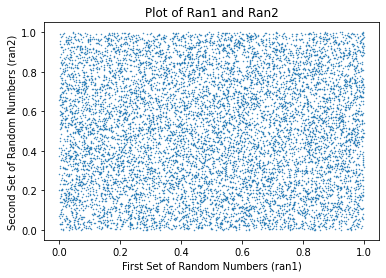

In [6]:
plt.scatter(df['ran1_norm'],df['ran2_norm'],s=0.2)
plt.xlabel('First Set of Random Numbers (ran1)')
plt.ylabel('Second Set of Random Numbers (ran2)')
plt.title('Plot of Ran1 and Ran2')
plt.show()

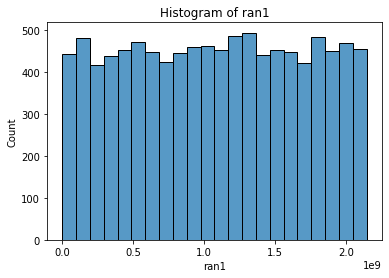

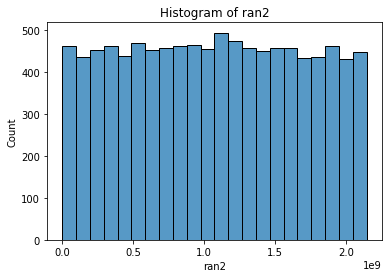

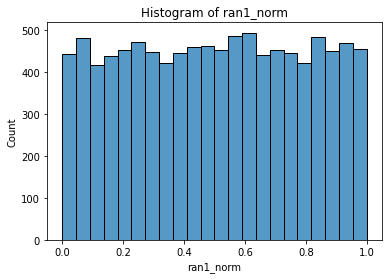

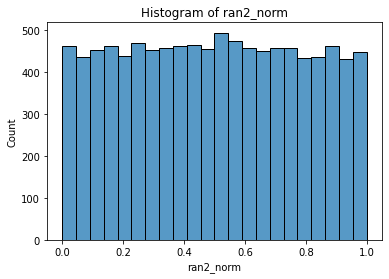

In [7]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

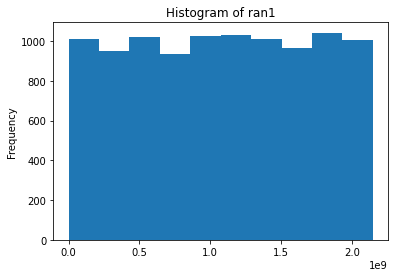

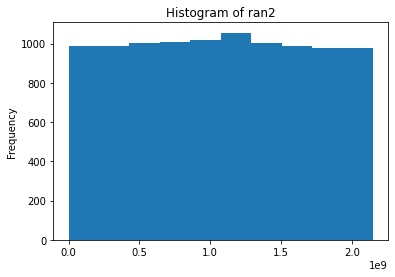

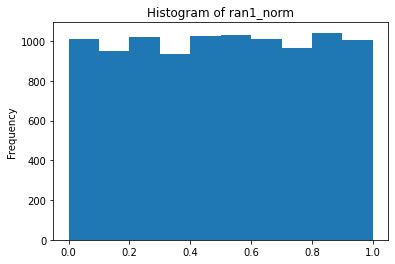

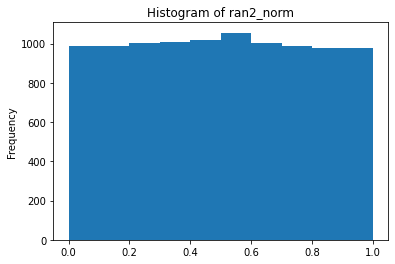

In [8]:
for column in df.columns:
    df[column].plot(kind='hist')
    plt.title(f'Histogram of {column}')
    plt.show()

## Using `random` module

In [9]:
import random

In [10]:
random_numbers = []
for i in range(10000):
    random_numbers.append({'ran1':random.random(),'ran2':random.random()})
df_m=pd.DataFrame(random_numbers)

In [11]:
df_m.head()

,ran1,ran2
0,0.155009,0.544370
1,0.560313,0.636991
2,0.268111,0.951746
3,0.251921,0.028699
4,0.560490,0.210824


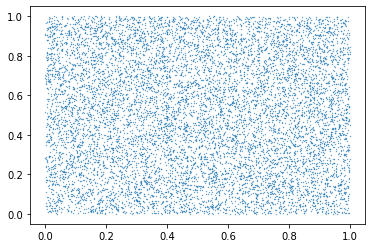

In [12]:
plt.scatter(df_m['ran1'],df_m['ran2'],s=0.1)

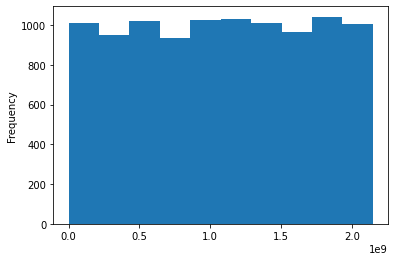

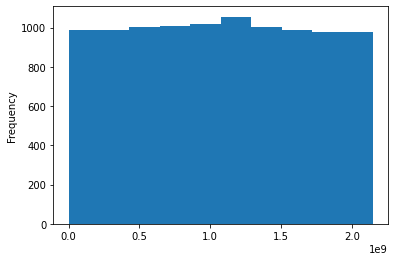

In [13]:
for column in df_m.columns:
    df[column].plot(kind='hist')
    plt.show()

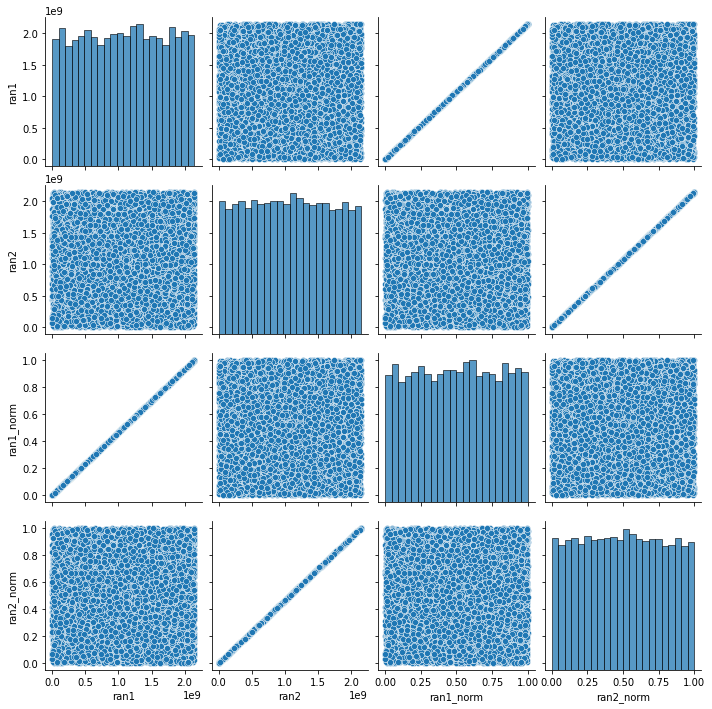

In [14]:
sns.pairplot(df)

In [23]:
import numpy as np
import math
df['ran1_gau'] = ((-2*np.log(df['ran1_norm']))**(1/2))*(math.cos(np.asarray(2*math.pi))*df['ran2_norm'])
df['ran2_gau'] = ((-2*np.log(df['ran1_norm']))**(1/2))*(math.sin(np.asarray(2*math.pi))*df['ran2_norm'])
df.replace([np.inf, -np.inf], 0, inplace=True)

c:\users\dipesh.poudel\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


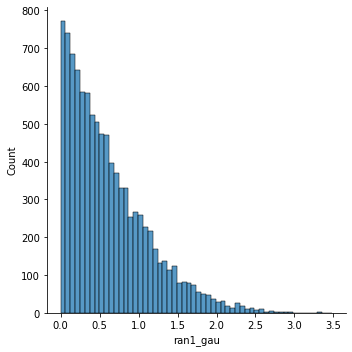

In [25]:
sns.displot(df['ran1_gau'])

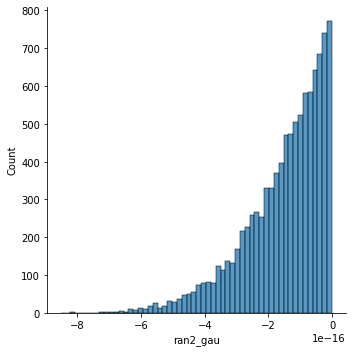

In [26]:
sns.displot(df['ran2_gau'])